In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Step 1: Data Preparation and Preprocessing
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_258_AU_882_A.csv')
df.head(5)

,Sl. No.,Region,State,NH No.,Site Description,Land Area (Ha.)
0,1,North,Uttar Pradesh,19,Kurgaon. Allahabad Bypass NH2,1.20
1,2,South,Andhra Pradesh,16,Gowravaram/AP,4.65
2,3,South,Andhra Pradesh,716,Vallur/AP,9.60
3,4,South,Karnataka,40,NH04_46.700+46.900_LHS_Yedehalli_Karnataka,2.22
4,5,West,Rajasthan,48,NH-48/20.057+20.357/RHS/Jaipur/Rajasthan/ Srig...,4.50


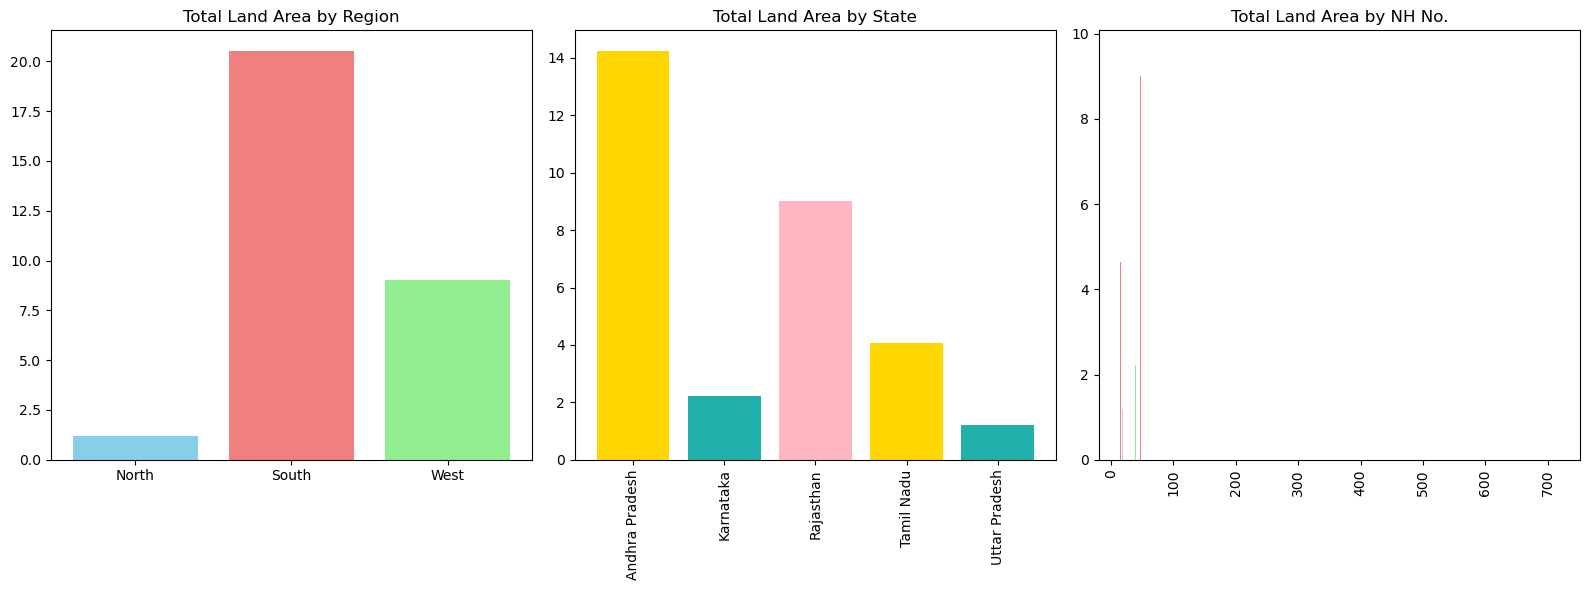

In [7]:
# Step 2: Data Analysis and Visualization
plt.figure(figsize=(16, 6))

# Bar chart for Land Area by Region with custom colors
plt.subplot(1, 3, 1)
region_land_area = df.groupby('Region')['Land Area (Ha.)'].sum().reset_index()
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Define custom colors
plt.bar(region_land_area['Region'], region_land_area['Land Area (Ha.)'], color=colors)
plt.title('Total Land Area by Region')

# Bar chart for Land Area by State with custom colors
plt.subplot(1, 3, 2)
state_land_area = df.groupby('State')['Land Area (Ha.)'].sum().reset_index()
colors = ['gold', 'lightseagreen', 'lightpink']  # Define custom colors
plt.bar(state_land_area['State'], state_land_area['Land Area (Ha.)'], color=colors)
plt.xticks(rotation=90)
plt.title('Total Land Area by State')

# Bar chart for Land Area by NH No. with custom colors
plt.subplot(1, 3, 3)
nh_land_area = df.groupby('NH No.')['Land Area (Ha.)'].sum().reset_index()
colors = ['lightcoral', 'lightblue', 'lightgreen']  # Define custom colors
plt.bar(nh_land_area['NH No.'], nh_land_area['Land Area (Ha.)'], color=colors)
plt.xticks(rotation=90)
plt.title('Total Land Area by NH No.')

plt.tight_layout()
plt.show()



In [5]:
# Step 3: Clustering Algorithm
# Feature Selection and Scaling
X = df[['Land Area (Ha.)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
k = 3  # You can adjust the number of clusters as needed
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=0, n_init=n_init)
df['Cluster'] = kmeans.fit_predict(X_scaled)

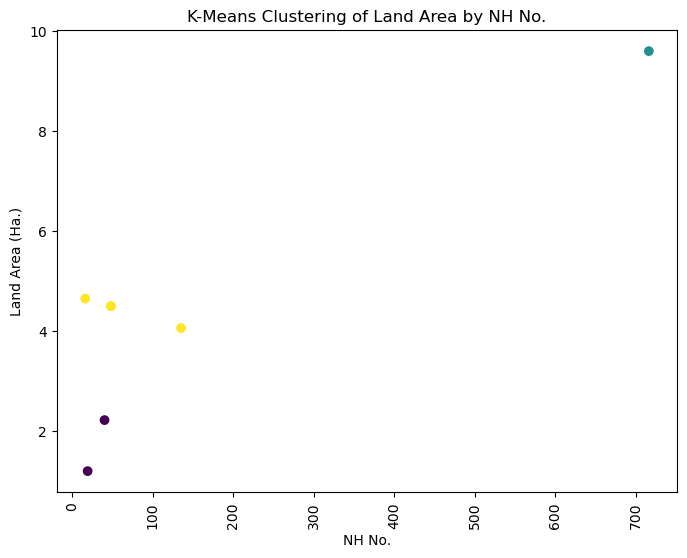

In [6]:
# Step 4: Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['NH No.'], df['Land Area (Ha.)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('NH No.')
plt.ylabel('Land Area (Ha.)')
plt.title('K-Means Clustering of Land Area by NH No.')
plt.xticks(rotation=90)
plt.show()

/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1298/3577327038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


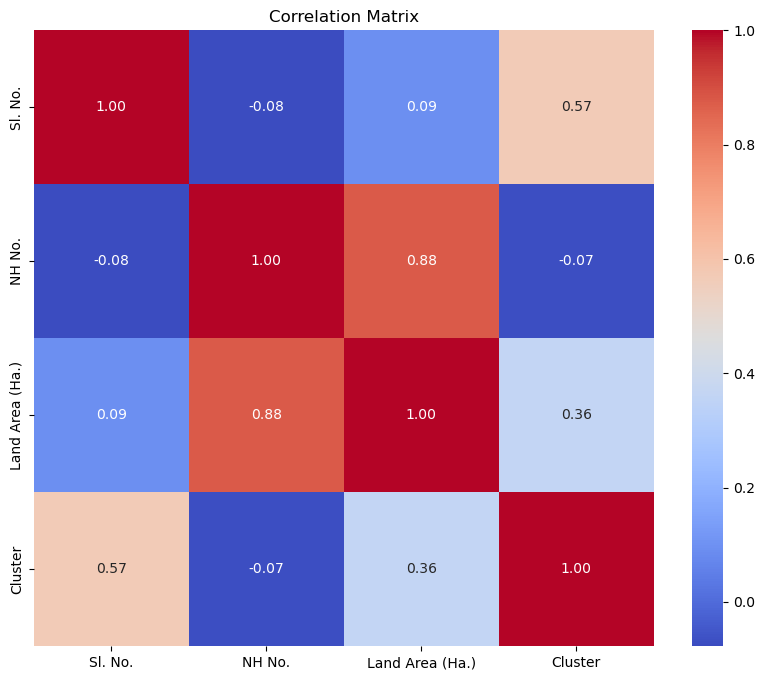

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()